# 4일차 과제 의사결정나무

In [29]:
## 그리드 탐색 import 

from sklearn.model_selection import GridSearchCV

#sklearn-train_test_split 함수
from sklearn.model_selection import train_test_split

from sklearn import tree


In [21]:
## 데이터 불러오기
am=pd.read_csv("유방암.csv",engine='python',encoding='CP949')


In [22]:
### 모든 변수가 연속형 변수이고 결측치가 없다는 것을 확인
### 즉 더미변수 처리 할 필요 없고 결측치 처리가 필요 없다.

#random seed 고정
# np.random.seed(seed=1234)
# am_y=am['diagnosis']
# am_x=am.drop('diagnosis',axis=1,inplace=False)

# msk=np.random.rand(am.shape[0])<0.7
# am_train=am[msk]
# am_test=am[~msk]

# am_train_y=am['diagnosis']
# am_train_x=am.drop('diagnosis',axis=1,inplace=False)
# am_test_y=am['diagnosis']
# am_test_x=am.drop('diagnosis',axis=1,inplace=False)




# 의사결정나무 모델 생성


In [65]:
# 생성트리의 옵션 확인
tree_uncustomized.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')>

In [72]:
## 테스트셋 트레인셋 나눠줌
am_train_x,am_test_x,am_train_y,am_test_y=train_test_split(am_x,am_y,test_size=0.2,random_state=1234)

In [73]:
## default 값으로 생성
tree_uncustomized=DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(am_train_x,am_train_y)
print("Accuracey on training set:{:.3f}".format(tree_uncustomized.score(am_train_x,am_train_y)))
print("Accuracey on test set:{:.3f}".format(tree_uncustomized.score(am_test_x,am_test_y)))


Accuracey on training set:1.000
Accuracey on test set:0.904


In [57]:
parameters={'criterion':('gini','entropy'),'min_samples_leaf':[i+1 for i in range(5,30)],
        'max_depth':[i+1 for i in range(10)],
        }

In [76]:
tr=tree.DecisionTreeClassifier(random_state=1234)
gsearch=GridSearchCV(tr,parameters,cv=10)
gsearch.fit(am_train_x,am_train_y)
model=gsearch.best_estimator_
model



/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [77]:
score_train=model.score(am_train_x,am_train_y)
score_test=model.score(am_test_x,am_test_y)



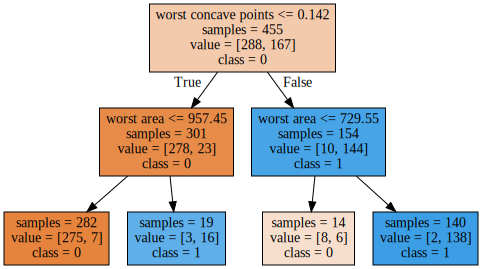

In [78]:
export_graphviz(model,out_file='tree.dot',class_names=['0','1'],
               feature_names=am_train_x.columns,impurity=False,filled=True)
os.environ['PATH']+=os.pathsep

with open('tree.dot') as f :
    dot_graph=f.read()
display(graphviz.Source(dot_graph))




In [79]:
score_train

0.9604395604395605

In [80]:
score_test

0.9210526315789473

In [81]:
## 변수중요도
feature_importance=pd.DataFrame()
feature_importance["feature"]=am_train_x.columns
feature_importance["importance"]=model.feature_importances_

feature_importance.sort_values(by="importance",ascending=False)


,feature,importance
27,worst concave points,0.825837
23,worst area,0.174163
0,mean radius,0.000000
1,mean texture,0.000000
28,worst symmetry,0.000000
26,worst concavity,0.000000
25,worst compactness,0.000000
24,worst smoothness,0.000000
22,worst perimeter,0.000000
21,worst texture,0.000000


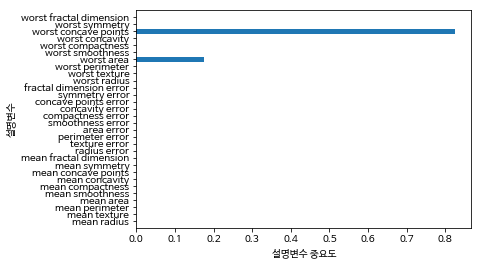

In [82]:
# 설명변수 중요도 그리는 함수 정의

def plot_feature_importances(model):
    n_features=am_train_x.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),am_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(model)